import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Task 1: Iterate over subfolders and count files
subfolders = sorted(next(os.walk('/kaggle/input/stanford-dogs-dataset/images/Images'))[1])
folder_counts = []

for folder in subfolders:
    folder_path = os.path.join('/kaggle/input/stanford-dogs-dataset/images/Images', folder)
    files = os.listdir(folder_path)
    file_count = len(files)
    folder_counts.append((folder, file_count))

df = pd.DataFrame(folder_counts)
df.columns = ['Breed','Count']
categ_2_keep = df.sort_values('Count', ascending=False).Breed[:5].to_list()

import tensorflow as tf
fpath = "/kaggle/input/stanford-dogs-dataset/images/Images"
img_size = 224
batch_size = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    fpath,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_size, img_size),
    color_mode="rgb",
    batch_size=batch_size,
    label_mode="categorical"
)

## https://www.kaggle.com/code/baorbaor/dog-images-classification-using-keras-alexnet

In [3]:
import os
import cv2
import random

from PIL import Image
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [13]:
path = "/kaggle/input/stanford-dogs-dataset/images/Images"

categories = os.listdir(path)
random.shuffle(categories)
categories = categories[:120]
labels_ = [cat[10:] for cat in categories]
print("List of categories = ",labels_,"\n\nNo. of categories = ", len(categories))


List of categories =  ['Pekinese', 'Old_English_sheepdog', 'Leonberg', 'cocker_spaniel', 'toy_poodle', 'EntleBucher', 'Bedlington_terrier', 'Rhodesian_ridgeback', 'Scottish_deerhound', 'whippet', 'Siberian_husky', 'affenpinscher', 'African_hunting_dog', 'basset', 'Doberman', 'Maltese_dog', 'Dandie_Dinmont', 'Brabancon_griffon', 'golden_retriever', 'Kerry_blue_terrier', 'Norwegian_elkhound', 'dhole', 'keeshond', 'boxer', 'Saint_Bernard', 'German_short-haired_pointer', 'Sealyham_terrier', 'papillon', 'wire-haired_fox_terrier', 'standard_schnauzer', 'redbone', 'Staffordshire_bullterrier', 'bull_mastiff', 'black-and-tan_coonhound', 'Border_terrier', 'bloodhound', 'French_bulldog', 'miniature_schnauzer', 'Cardigan', 'Pembroke', 'Labrador_retriever', 'clumber', 'Chesapeake_Bay_retriever', 'Weimaraner', 'Newfoundland', 'Walker_hound', 'West_Highland_white_terrier', 'Irish_water_spaniel', 'komondor', 'Scotch_terrier', 'borzoi', 'Afghan_hound', 'curly-coated_retriever', 'kelpie', 'Welsh_springe

#### how to use RGB or Grey images
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:150]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            img_lst.append(np.array(resized_img))
            labels.append(index)
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

In [21]:
img_lst=[]
labels=[]
img_n=[]
for index, category in tqdm(enumerate(categories)):
    images = os.listdir(path+"/"+category)
    np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
    random.shuffle(images)
    images = images             # here limites the number of images per categories
    for image_name in images:
        img_n.append(path+"/"+category+"/"+image_name)
        labels.append(category[10:])
oe = pd.Series(img_n)

120it [00:00, 1221.14it/s]


In [ ]:
to_plot = pd.Series(labels)
ax = to_plot.value_counts()[:].plot.barh(figsize=(4, 8))
ax.set_title("Dogs breed")
plt.show()

In [10]:
### how to use data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:50]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            #img_lst.append(np.array(resized_img))
            #labels.append(index)
            
            for i in np.arange(3):             # apply n random transformations
                angmented_img = datagen.random_transform(np.array(resized_img))
                img_lst.append(np.array(resized_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

10it [00:33,  3.33s/it]

No. of images loaded =  1500 
No. of labels loaded =  1500
<class 'list'> <class 'list'>


0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
8    150
9    150
dtype: int64

### allows to use grey scale image with ImageDataGenerator by ading channels
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        #random.shuffle(images)
        images = images[:150]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'L')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((300, 300))
            
            
            img_data = np.expand_dims(resized_img, axis=-1)  # to use dataaugmentation in grey scale, Add channel dimension
            img_data = np.repeat(img_data, 3, axis=-1)  # Repeat the single channel to create a multi-channel image
            
            
            img_lst.append(np.array(img_data))
            labels.append(index)
            
            for i in np.arange(3):             # apply 3 random transformations
                angmented_img = datagen.random_transform(np.array(img_data))       # change variable in np.array() if not grey scale
                img_lst.append(np.array(angmented_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)

print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

# check that the classes are equilibrated
to_plot = pd.Series(labels).value_counts()
to_plot.index = labels_
to_plot.plot.pie(labels=to_plot.index, cmap='Set3')   # numpy.round(val/100.*sizes.sum(), 0)

### here we need to make an array from a list of list
- we use numpy.array() / 255 to normalize pixels intensity between 0 and 1

In [11]:
print("*** images format ***\n\n",images[1][:2])   # each images is a 2D list of list
print("\n*** labels format ***\n\n",labels[145:165]) # a list of labels
images = np.array(images)
labels = np.array(labels)

print("\nShapes:\nImages shape ",images.shape)
#images = np.mean(images, axis=-1, keepdims=True)        # we add this line to get back to grey scale and limit the number of parameters in the CNN
print("\nShapes:\nImages shape ",images.shape)


print("\n==> Necessary to normalize images' pixels")
images = images.astype(np.float32)                      #### not necessary if using image transfo function ?!?
labels = labels.astype(np.int32)                         #### not necessary ...
images = images/255
print("\n\n*** images format after normalisation ***\n\n",images[1][:2])
print("\nShapes:\nImages shape ",images.shape,"Labels shape = ",labels.shape)

*** images format ***

 [[[110 107  72]
  [ 96  93  58]
  [ 72  70  35]
  ...
  [197 165 154]
  [204 173 162]
  [205 174 163]]

 [[106 102  67]
  [ 97  93  59]
  [ 79  76  43]
  ...
  [179 155 140]
  [185 161 146]
  [191 168 152]]]

*** labels format ***

 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Shapes:
Images shape  (1500, 300, 300, 3)

Shapes:
Images shape  (1500, 300, 300, 3)

==> Necessary to normalize images' pixels


*** images format after normalisation ***

 [[[0.43137255 0.41960785 0.28235295]
  [0.3764706  0.3647059  0.22745098]
  [0.28235295 0.27450982 0.13725491]
  ...
  [0.77254903 0.64705884 0.6039216 ]
  [0.8        0.6784314  0.63529414]
  [0.8039216  0.68235296 0.6392157 ]]

 [[0.41568628 0.4        0.2627451 ]
  [0.38039216 0.3647059  0.23137255]
  [0.30980393 0.29803923 0.16862746]
  ...
  [0.7019608  0.60784316 0.54901963]
  [0.7254902  0.6313726  0.57254905]
  [0.7490196  0.65882355 0.59607846]]]

Shapes:
Images shape  (1500, 300, 300, 3) Labe

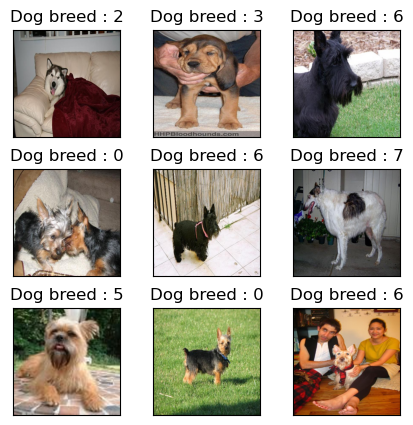

In [12]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (5 , 5))

    for i in range(9):

        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , i+1)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

### here we need to split data to train the model:
- 75% train
- 15% validation
- 10% test

In [ ]:
# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size = 0.75, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

# split to test and to validate
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42, stratify=y_test)

x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')

In [ ]:
print("\nShapes:\nImages shape ",x_train.shape,"Labels shape = ",y_train.shape)

### first model inspired from OCP course

In [ ]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from keras import regularizers

model=Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300,3), padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten(input_shape=(150,150,32)))

initializer = tf.keras.initializers.GlorotNormal()
model.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
model.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

model.add(layers.Dense(20,activation="softmax"))

#model.build((None, 300, 300, 3))
model.summary()

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])




#*****************************
#***** ACTIVATION FUNCTION OPTIMISATION ***********
#
# -------> use GeLU: combines dropout (zeroing out neurons randomly for a sparse network), zone out (maintain previous value), and ReLU. It weights inputs by percentile rather than gates, leading to a smoother version of ReLU.
# -------> use Swish:  Can be used as a drop in replacement for ReLU

### here we used compile model to train with an early stopping
- batch of 64
- 50 epochs
- early stop with min val_loss of 0.1 using patience of 3 and restore weights

In [ ]:
import tensorflow as tf
# using early stopping
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.1, verbose=1, patience=3, restore_best_weights=True) # 
history = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=2, validation_data = (x_valid, y_valid))#, callbacks=[early_stop])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

# ## CNN model inspired from OCP with 3 Conv layer 
### why not using RNN instead? 
##### --> RNNs are inferior to CNNs for most image processing tasks
##### https://stackoverflow.com/questions/49485480/classification-of-images-with-recurrent-neural-networks

### later use slighly different architecture from OCP/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras import initializers, regularizers, layers

print("we use model with 3 conv layer each having 32, 64 and 128 filters, respectivelly")

model = Sequential()

# First Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.BatchNormalization())
model.add(Flatten())

initializer = initializers.HeNormal()
model.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
model.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(20, activation='softmax'))  # Assuming 5 classes

model.summary()

In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data = (x_valid, y_valid))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

In [ ]:
stop

In [ ]:
plt.figure(1 , figsize = (5 , 12))

for i in range(9):
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(9, 1, i+1)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , np.argmax(pred, axis=1)[r[0]] ))
    plt.xticks([]) , plt.yticks([])

plt.show()



In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# make OCP VGG16
#### https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles/5097666-tp-implementez-votre-premier-reseau-de-neurones-avec-keras
#### https://github.com/keras-team/keras/blob/master/keras/applications/vgg16.py

In [ ]:
import keras
from keras import layers, regularizers, optimizers, initializers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

my_VGG16.add(Conv2D(64, (3, 3), input_shape=(300, 300, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

initializer = initializers.HeNormal()
my_VGG16.add(layers.Dense(512,activation="relu", kernel_initializer=initializer))
my_VGG16.add(layers.Dense(512,activation="relu", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))

my_VGG16.add(Dense(20, activation='softmax'))

my_VGG16.summary()

my_VGG16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimizers.SGD(lr=0.001, momentum=0.9)


In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.75, random_state = 42)


history = my_VGG16.fit(x_train, y_train, epochs=50, batch_size=64, validation_data = (x_valid, y_valid))

# apprentissage super long!
-- 1 - changer regularizer en diminuant parameter par ordre de grandeur // aide pas
-- 2 - changer initializer to He Normal // aide pas
-- 3 - utiliser moins de classes et plus d'images
-- 4 - changer optimizer pour sgd //

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = my_VGG16.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

## use VGG16 od keras

In [10]:
path = "/kaggle/input/stanford-dogs-dataset/images/Images"

categories = os.listdir(path)
random.shuffle(categories)
categories = categories[:50]
labels_ = [cat[10:] for cat in categories]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02110627-affenpinscher', 'n02107574-Greater_Swiss_Mountain_dog', 'n02112018-Pomeranian', 'n02107312-miniature_pinscher', 'n02107908-Appenzeller', 'n02104365-schipperke', 'n02094258-Norwich_terrier', 'n02106550-Rottweiler', 'n02105251-briard', 'n02110185-Siberian_husky', 'n02098286-West_Highland_white_terrier', 'n02095570-Lakeland_terrier', 'n02109047-Great_Dane', 'n02086240-Shih-Tzu', 'n02108089-boxer', 'n02101388-Brittany_spaniel', 'n02111500-Great_Pyrenees', 'n02104029-kuvasz', 'n02109961-Eskimo_dog', 'n02105505-komondor', 'n02113978-Mexican_hairless', 'n02100877-Irish_setter', 'n02099429-curly-coated_retriever', 'n02098413-Lhasa', 'n02112706-Brabancon_griffon', 'n02096294-Australian_terrier', 'n02089078-black-and-tan_coonhound', 'n02107142-Doberman', 'n02091244-Ibizan_hound', 'n02085782-Japanese_spaniel', 'n02106166-Border_collie', 'n02094433-Yorkshire_terrier', 'n02093647-Bedlington_terrier', 'n02085936-Maltese_dog', 'n02102318-cocker_spaniel', 'n02097658-s

In [11]:
### how to use data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (up to 20 degrees)
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest',     # Fill mode for newly created pixels
    data_format='channels_last'
)

            
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in tqdm(enumerate(categories)):
        images = os.listdir(path+"/"+category)
        np.random.seed(42)                # shuffle because they are organized as coming from list_dir function
        random.shuffle(images)
        images = images[:20]             # here limites the number of images per categories
        for image_name in images:
            img = cv2.imread(path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # keeps RGB columns
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_array = Image.fromarray(img, 'RGB')     #.  'RGB' / 'L'   for color or grey scale
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((224, 224))
            
            #img_lst.append(np.array(resized_img))
            #labels.append(index)
            
            for i in np.arange(3):             # apply n random transformations
                angmented_img = datagen.random_transform(np.array(resized_img))
                img_lst.append(np.array(resized_img))
                labels.append(index)
            
            
            
            
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))
pd.Series(labels).value_counts()

50it [00:47,  1.04it/s]

No. of images loaded =  3000 
No. of labels loaded =  3000
<class 'list'> <class 'list'>


0     60
37    60
27    60
28    60
29    60
30    60
31    60
32    60
33    60
34    60
35    60
36    60
38    60
1     60
39    60
40    60
41    60
42    60
43    60
44    60
45    60
46    60
47    60
48    60
26    60
25    60
24    60
23    60
2     60
3     60
4     60
5     60
6     60
7     60
8     60
9     60
10    60
11    60
12    60
13    60
14    60
15    60
16    60
17    60
18    60
19    60
20    60
21    60
22    60
49    60
dtype: int64

In [12]:
images = np.array(images)
labels = np.array(labels)

images = images.astype(np.float32)                      #### not necessary if using image transfo function ?!?
labels = labels.astype(np.int32)                         #### not necessary ...
images = images/255

# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size = 0.75, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

# split to test and to validate
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42, stratify=y_test)

x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')



In [6]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras import Model, regularizers
# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau
x = model.output
x = Flatten(name="flatten")(x)
x = Dense(512, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
x = Dense(512, activation='relu',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))(x)
# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
predictions = Dense(120, activation='softmax')(x)

# Définir le nouveau modèle
new_model = Model(inputs=model.input, outputs=predictions)

new_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [13]:
from keras import optimizers
from keras.callbacks import EarlyStopping
for layer in new_model.layers[0:-3]:
    layer.trainable = False

new_model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer='adam', #optimizers.SGD(lr=0.001, momentum=0.9), 
                  metrics=["accuracy"])

#early_stop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.1, verbose=1, patience=10, restore_best_weights=True) # 
model_info = new_model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data = (x_valid, y_valid))#, callbacks=[early_stop])

Epoch 1/5
36/36 - 13s - loss: 4.7816 - accuracy: 0.1036 - val_loss: 3.2636 - val_accuracy: 0.3133 - 13s/epoch - 357ms/step
Epoch 2/5
36/36 - 10s - loss: 2.0403 - accuracy: 0.6533 - val_loss: 1.3918 - val_accuracy: 0.8178 - 10s/epoch - 291ms/step
Epoch 3/5
36/36 - 11s - loss: 0.8210 - accuracy: 0.9582 - val_loss: 0.8997 - val_accuracy: 0.9400 - 11s/epoch - 294ms/step
Epoch 4/5
36/36 - 11s - loss: 0.5621 - accuracy: 0.9951 - val_loss: 0.6479 - val_accuracy: 0.9733 - 11s/epoch - 319ms/step
Epoch 5/5
36/36 - 12s - loss: 0.4624 - accuracy: 0.9987 - val_loss: 0.5646 - val_accuracy: 0.9756 - 12s/epoch - 322ms/step


In [ ]:
model_info = new_model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data = (x_valid, y_valid))#, callbacks=[early_stop])

10/10 [==============================] - 1s 129ms/step


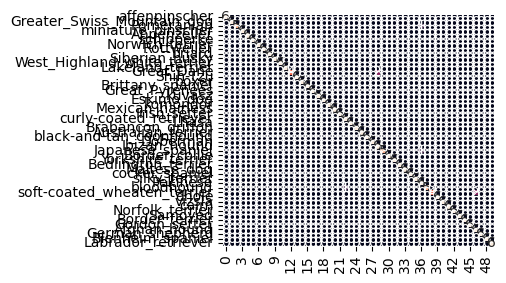

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         6
          12       1.00      0.67      0.80         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         6
          17       1.00    

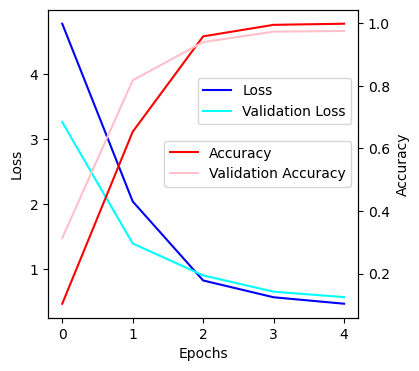

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred = new_model.predict(x_test)
c = confusion_matrix(y_test,np.argmax(pred, axis=1))

# **************************************************

fig, ax = plt.subplots(figsize=(3.5, 3))
sns.heatmap(c, ax=ax, yticklabels=labels_, annot=True, fmt='.0f', cbar=False)
#ax.set_xticklabels(labels_, rotation=45, ha='right')
plt.show()

# **************************************************

from sklearn.metrics import classification_report
print(classification_report(y_test,np.argmax(pred, axis=1)))

# **************************************************

plt.figure(figsize=(4,4))
plt.plot(model_info.history['loss'], color='blue', label='Loss')
plt.plot(model_info.history['val_loss'], color='cyan', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right', bbox_to_anchor=(1,0.8))

ax2 = plt.twinx()
plt.plot(model_info.history['accuracy'], color='red', label='Accuracy')
plt.plot(model_info.history['val_accuracy'], color='pink', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

In [ ]:
import pickle

pickle.dump(labels_, open('/kaggle/working/breed_names.save', 'wb'))
new_model.save('/kaggle/working/model_vgg16_fine_tuned_6pic_4transf.keras', overwrite=True, save_format="keras")
new_model.save_weights('/kaggle/working/model_vgg16_tuned_weight.keras',overwrite=True)

# split to learn model
x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size = 0.75, random_state = 42, stratify=labels)

x_train = x_train.astype('float32')
y_train = y_train.astype('int32')

# split to test and to validate
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42, stratify=y_test)

x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')
## Prediction

In [ ]:
image.shape

1/1 [==============================] - 0s 27ms/step


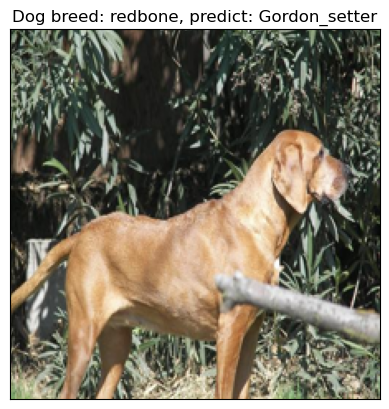

In [15]:
path = "/kaggle/input/stanford-dogs-dataset/images/Images"
np.random.seed(42)

categories = os.listdir(path)
random.shuffle(categories)

images = os.listdir(path+"/"+categories[0])
random.shuffle(images)
img = cv2.imread(path+"/"+categories[0]+"/"+images[0])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = Image.fromarray(img, 'RGB')     
resized_img = img_array.resize((224, 224))

image = np.array(resized_img)
image = image.astype(np.float32)                     
image = image/255

image = np.expand_dims(image, axis=0)

pred = new_model.predict(image)
_label = labels_[np.argmax(pred)]


image = np.reshape(image, (224, 224, 3))
plt.imshow(image)
plt.title('Dog breed: {}, predict: {}'.format(categories[0][10:],_label))
plt.xticks([])
plt.yticks([])
plt.show()